In [1]:
import numpy as np
from bspline import Bspline_FixedKnots
from bspline import Bspline_DynamicKnots

# import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(seed = 42)

def trueFuncdef(X: np.ndarray) -> np.ndarray:

    Nt = X.shape

    coef = np.random.random(size = (1, 4)) - 0.5
    X = np.repeat(np.expand_dims(X, axis = 1), repeats = 4, axis = 1)
    X = np.cumprod(X, axis = 1)

    X = np.sum(X * coef, axis = 1)
    X = X + np.random.random(size = (Nt)) * 0.1

    return X

X = np.random.random(size = (10000))
y = trueFuncdef(X = X)

In [3]:
xt = np.linspace(0.2, 0.8, num = 7)
bs1 = Bspline_FixedKnots(xt = xt, k = 1, extrapolate = True)
bs1.fit(X = X, y = y)

bs2 = Bspline_FixedKnots(xt = xt, k = 2, extrapolate = True)
bs2.fit(X = X, y = y)

bs_jnp = Bspline_DynamicKnots(knot_num = 7, k = 1, extrapolate = True)
bs_jnp.fit(X = X, y = y)

In [4]:
print(
    np.mean((y - bs1.predict(X = X)) * (y - bs1.predict(X = X)), axis = None),
    np.mean((y - bs2.predict(X = X)) * (y - bs2.predict(X = X)), axis = None),
)

0.0008643785083982402 0.0008375803128930006


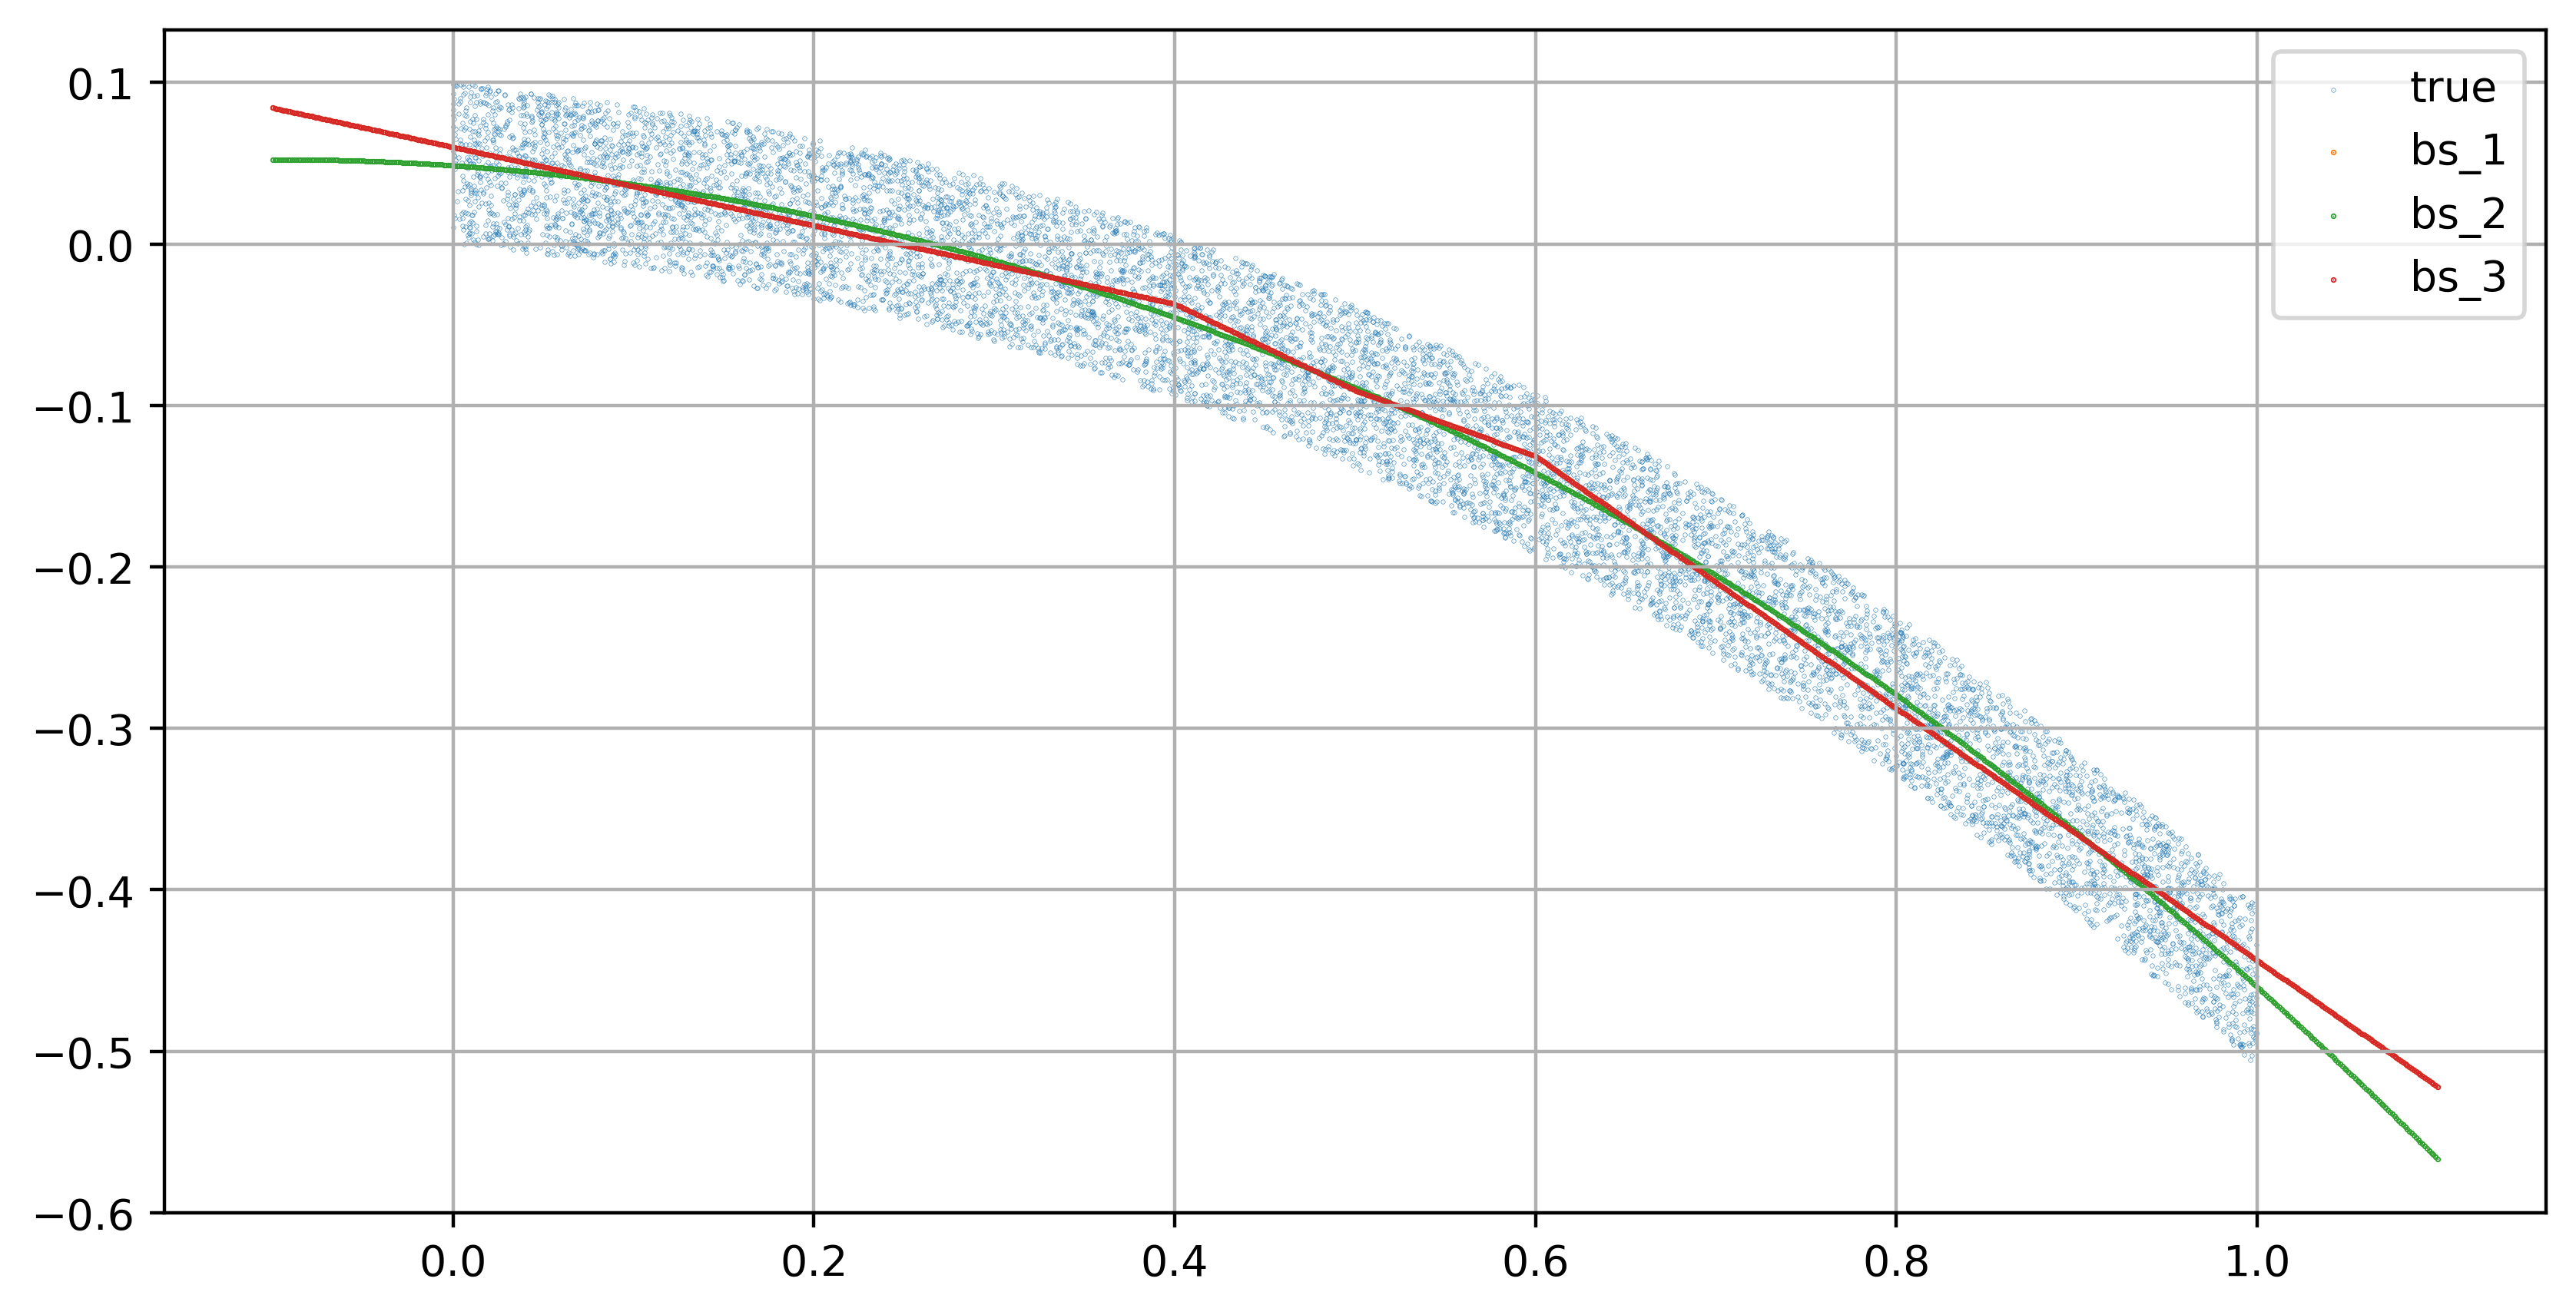

In [5]:
X_infer = np.linspace(-0.1, 1.1, num = 1000)
y_Infer_1 = bs1.predict(X = X_infer)
y_Infer_2 = bs2.predict(X = X_infer)
y_Infer_3 = bs_jnp.predict(X = X_infer)
plt.figure(figsize = (10, 5), dpi = 400)

plt.scatter(X, y, s = 0.01, label = 'true')
plt.scatter(X_infer, y_Infer_1, s = 0.1, label = 'bs_1')
plt.scatter(X_infer, y_Infer_2, s = 0.1, label = 'bs_2')
plt.scatter(X_infer, y_Infer_3, s = 0.1, label = 'bs_3')

plt.legend()
plt.grid()
plt.show()